In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('../data/raw/train_data.csv')

df.replace(-1.0, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)

# Convert date columns to datetime
df['launch_date'] = pd.to_datetime(df['launch_date'])
df['date'] = pd.to_datetime(df['date'])
df['ind_launch_date'] = pd.to_datetime(df['ind_launch_date'], errors='coerce')

# Convert lists from strings to actual lists
import ast
df['indication'] = df['indication'].apply(ast.literal_eval)

df.to_csv('../data/intermig/train_data-withNaNs.csv', index=False)
df.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,NaT,[IND_C3B6],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,NaN,NaN,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01,"[IND_1590, IND_ECAC]",NaN,1.023562,0.000047,NaN,1.626677,NaN,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,NaT,[IND_B2EF],1.893333,1.008039,0.001502,NaN,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,NaT,[IND_BAFB],1.000000,1.253186,0.001304,NaN,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,NaT,[IND_3F31],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312


In [30]:
# Calculate the difference in months
df['months_since_launch'] = (
    (df['date'].dt.year - df['launch_date'].dt.year) * 12 +
    (df['date'].dt.month - df['launch_date'].dt.month)
)

# If you want to account for the day of the month
df['months_since_launch'] -= df['date'].dt.day < df['launch_date'].dt.day

# Convert to integer type
df['months_since_launch'] = df['months_since_launch'].astype(int)

print('Shape:', df.shape)
# Display the updated DataFrame
df.head()

Shape: (118917, 20)


,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,months_since_launch
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,NaT,[IND_C3B6],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,0
1,BRAND_626D,NaN,NaN,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01,"[IND_1590, IND_ECAC]",NaN,1.023562,0.000047,NaN,1.626677,NaN,THER_AREA_96D7,1.000000,0
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,NaT,[IND_B2EF],1.893333,1.008039,0.001502,NaN,3.144874,1.835821,THER_AREA_96D7,1.002258,0
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,NaT,[IND_BAFB],1.000000,1.253186,0.001304,NaN,1.213446,1.805970,THER_AREA_6CEE,1.068761,0
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,NaT,[IND_3F31],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,0


## A. Drug-related data

In [31]:
df['year'] = df['date'].dt.year.astype('Int64')  # Using 'Int64' for nullable integers
drugsdf = df[['drug_id', 'launch_date', 'year', 'indication', 'prev_perc', 'country', 'population', 'price_unit', 'price_month', 'therapeutic_area']]
drugsdf = drugsdf.sort_values(by=['drug_id', 'year'])

# ME FALLAN prev_perc, price_unit. EL RESTO TIENEN GRANULARIDAD ANUAL
for field in ['prev_perc', 'price_unit']:
    print(f"\nAnalyzing field: '{field}'")
    
    # Group by ['drug_id', 'country', 'year'] and count unique values in the current field
    field_counts = drugsdf.groupby(['drug_id', 'country', 'year'])[field].nunique().reset_index(name='nonunique_vals')
    
    # Identify groups with more than one unique value in the current field
    multiple_yearly = field_counts[field_counts['nonunique_vals'] > 1]
    
    # Number of groups with non-unique values
    num_nonunique = multiple_yearly.shape[0]
    print(f"Number of groups with multiple unique '{field}' values:", num_nonunique)
    
    # Optionally, display some of these problematic groups
    print(f"\nSample groups with multiple '{field}' values:")
    print(multiple_yearly.head())
    
    # Merge to get the subset of data with non-unique groups
    filtered_df = drugsdf.merge(multiple_yearly, on=['drug_id', 'country', 'year'])
    
    # Calculate the standard deviation of the field within each non-unique group
    std_devs = filtered_df.groupby(['drug_id', 'country', 'year'])[field].std().reset_index(name='std_dev')
    
    # Calculate summary statistics of the standard deviations
    average_std = std_devs['std_dev'].mean()
    median_std = std_devs['std_dev'].median()
    max_std = std_devs['std_dev'].max()
    min_std = std_devs['std_dev'].min()
    
    print(f"\nStandard Deviation Statistics for '{field}' in Non-Unique Groups:")
    print(f"Average Standard Deviation: {average_std:.4f}")
    print(f"Median Standard Deviation: {median_std:.4f}")
    print(f"Maximum Standard Deviation: {max_std:.4f}")
    print(f"Minimum Standard Deviation: {min_std:.4f}")
    
    # Optionally, display the first few standard deviations
    print(f"\nSample Standard Deviations for '{field}' in Non-Unique Groups:")
    print(std_devs.head())


Analyzing field: 'prev_perc'
Number of groups with multiple unique 'prev_perc' values: 242

Sample groups with multiple 'prev_perc' values:
         drug_id       country  year  nonunique_vals
0   DRUG_ID_0259  COUNTRY_0309  2019               2
5   DRUG_ID_0259  COUNTRY_06E4  2019               2
69  DRUG_ID_0259  COUNTRY_6C16  2019               2
74  DRUG_ID_0259  COUNTRY_6F78  2019               3
94  DRUG_ID_0259  COUNTRY_907E  2019               2

Standard Deviation Statistics for 'prev_perc' in Non-Unique Groups:
Average Standard Deviation: 0.0023
Median Standard Deviation: 0.0009
Maximum Standard Deviation: 0.0319
Minimum Standard Deviation: 0.0000

Sample Standard Deviations for 'prev_perc' in Non-Unique Groups:
        drug_id       country  year   std_dev
0  DRUG_ID_0259  COUNTRY_0309  2019  0.001318
1  DRUG_ID_0259  COUNTRY_06E4  2019  0.001303
2  DRUG_ID_0259  COUNTRY_6C16  2019  0.001318
3  DRUG_ID_0259  COUNTRY_6F78  2019  0.003048
4  DRUG_ID_0259  COUNTRY_907E  2019  

In [32]:
drugsdf = df[['drug_id', 'launch_date', 'date', 'indication', 'prev_perc', 'country', 'population', 'price_unit', 'price_month', 'therapeutic_area']]

drugsdf = drugsdf.groupby(['drug_id', 'country', 'price_unit']).agg({
    'launch_date': 'first',
    'indication': 'first', 
    'date': 'first',
    'prev_perc': 'mean', 
    'population': 'mean', 
    'price_month': 'mean', 
}).reset_index()

print('Shape:', drugsdf.shape)

drugsdf.head()

Shape: (114922, 9)


,drug_id,country,price_unit,launch_date,indication,date,prev_perc,population,price_month
0,DRUG_ID_0259,COUNTRY_0309,1.083310,2019-02-01,"[IND_A24B, IND_BD8B]",2019-02-01,0.008837,1.495282,1.110512
1,DRUG_ID_0259,COUNTRY_0309,1.118686,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-04-01,0.011448,1.496292,1.131595
2,DRUG_ID_0259,COUNTRY_0309,1.135929,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-06-01,0.011448,1.496292,1.131595
3,DRUG_ID_0259,COUNTRY_0309,1.137036,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-05-01,0.011448,1.496292,1.131595
4,DRUG_ID_0259,COUNTRY_0309,1.140992,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2019-11-01,0.011361,1.495282,1.110512


## B. Country data specifics

In [33]:

countrydf = df[['country', 'che_pc_usd', 'che_perc_gdp','date', 'year', 'insurance_perc_che', 'population', 'public_perc_che']]

for field in ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'population', 'public_perc_che']:
    print(f"\nAnalyzing field: '{field}'")
    
    # Group by ['country', 'year'] and count unique values in the current field
    field_counts = countrydf.groupby(['country', 'year'])[field].nunique().reset_index(name='nonunique_vals')
    
    # Identify groups with more than one unique value in the current field
    multiple_yearly = field_counts[field_counts['nonunique_vals'] > 1]
    
    # Number of groups with non-unique values
    num_nonunique = multiple_yearly.shape[0]
    print(f"Number of groups with multiple unique '{field}' values:", num_nonunique)


Analyzing field: 'che_pc_usd'
Number of groups with multiple unique 'che_pc_usd' values: 0

Analyzing field: 'che_perc_gdp'
Number of groups with multiple unique 'che_perc_gdp' values: 0

Analyzing field: 'insurance_perc_che'
Number of groups with multiple unique 'insurance_perc_che' values: 0

Analyzing field: 'population'
Number of groups with multiple unique 'population' values: 0

Analyzing field: 'public_perc_che'
Number of groups with multiple unique 'public_perc_che' values: 0


Aquí podem observar que hi ha prous Countries amb NaN values en els seus facts, que imputarem:

In [34]:
countrydf = df[['country', 'che_pc_usd', 'che_perc_gdp', 'year', 'insurance_perc_che', 'population', 'public_perc_che']]

tmp = countrydf[countrydf['insurance_perc_che'].isna()]

tmp

,country,che_pc_usd,che_perc_gdp,year,insurance_perc_che,population,public_perc_che
1,COUNTRY_8B47,NaN,NaN,2014,NaN,1.023562,NaN
9,COUNTRY_89F9,1.669007,1.764281,2014,NaN,1.495485,1.940299
11,COUNTRY_1007,1.486735,1.809198,2014,NaN,1.462456,1.880597
12,COUNTRY_1007,1.486735,1.809198,2014,NaN,1.462456,1.880597
13,COUNTRY_4242,1.983770,1.996191,2014,NaN,1.009725,2.000000
...,...,...,...,...,...,...,...
118903,COUNTRY_1007,1.518258,1.834731,2022,NaN,1.453579,1.878933
118904,COUNTRY_89F9,1.874532,2.020277,2022,NaN,1.520144,1.985847
118907,COUNTRY_8B47,NaN,NaN,2022,NaN,1.025199,NaN
118912,COUNTRY_C8F4,2.074438,2.058055,2022,NaN,1.049808,2.029851


In [35]:
def calculate_null_percentages(dataframe):
    null_percent = dataframe.isnull().mean() * 100
    null_percent = null_percent.round(2)
    null_percent = null_percent.sort_values(ascending=False)
    return null_percent
country_cols = ['country', 'che_pc_usd', 'che_perc_gdp', 'year', 'insurance_perc_che', 'population', 'public_perc_che']
countrydf = df[country_cols]
countrydf = countrydf.groupby(['country', 'year']).first(skipna=True).reset_index()
print(calculate_null_percentages(countrydf))

print('Shape:', countrydf.shape)

countrydf.info()


insurance_perc_che    19.95
che_perc_gdp           4.23
che_pc_usd             2.11
public_perc_che        2.11
country                0.00
year                   0.00
population             0.00
dtype: float64
Shape: (426, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             426 non-null    object 
 1   year                426 non-null    Int64  
 2   che_pc_usd          417 non-null    float64
 3   che_perc_gdp        408 non-null    float64
 4   insurance_perc_che  341 non-null    float64
 5   population          426 non-null    float64
 6   public_perc_che     417 non-null    float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 23.8+ KB


Resulta que pel `COUNTRY_8B47` només tenim les dades de població!!

Pel `COUNTRY_5180` ens falta el 'che_perc_gdp'

El camp 'insurance_perc_che' conté algun missing value per diversos països

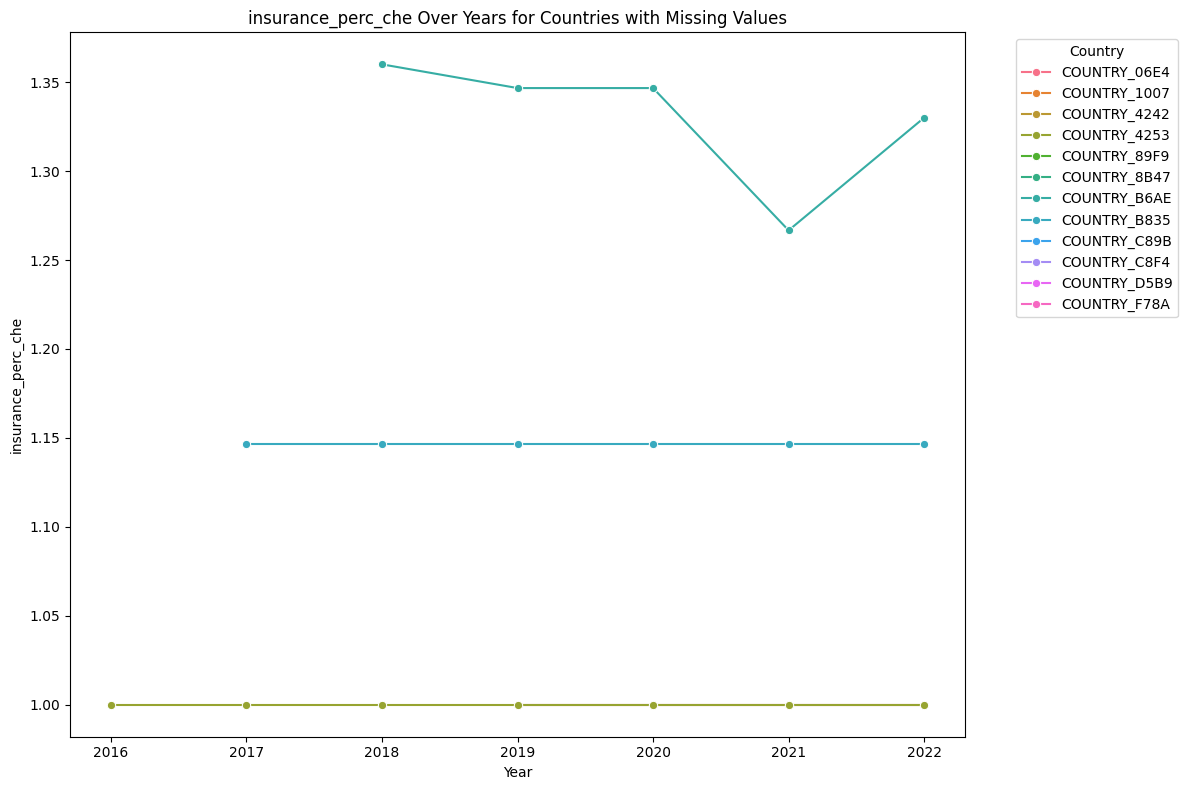

['COUNTRY_06E4', 'COUNTRY_4253', 'COUNTRY_B6AE', 'COUNTRY_B835']


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

field = 'insurance_perc_che'

# Identify countries with at least one missing 'field'
countries_with_missing = countrydf[countrydf[field].isnull()]['country'].unique()

# Filter the dataframe for these countries
missing_che_pc_usd_df = countrydf[countrydf['country'].isin(countries_with_missing)]

# Plot 'field' over 'year' for these countries
plt.figure(figsize=(12, 8))
sns.lineplot(data=missing_che_pc_usd_df, x='year', y=field, hue='country', marker='o')

plt.title(f"{field} Over Years for Countries with Missing Values")
plt.xlabel("Year")
plt.ylabel(field)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

number_of_non_missing = missing_che_pc_usd_df.groupby('country')[field].count()

number_of_non_missing = number_of_non_missing[number_of_non_missing > 0]
print(number_of_non_missing.index.tolist())

In [37]:
countrydf.to_csv('../data/intermig/countrydf_uninputed.csv', index=False)
countrydf

,country,year,che_pc_usd,che_perc_gdp,insurance_perc_che,population,public_perc_che
0,COUNTRY_0309,2014,1.758115,2.068685,2.013333,1.487479,1.791045
1,COUNTRY_0309,2015,1.772316,2.085917,2.013333,1.489576,1.791045
2,COUNTRY_0309,2016,1.650593,1.866491,2.013333,1.491407,1.820896
3,COUNTRY_0309,2017,1.660424,1.875446,2.026667,1.492894,1.865672
4,COUNTRY_0309,2018,1.683833,1.890154,2.026667,1.494175,1.880597
...,...,...,...,...,...,...,...
421,COUNTRY_FA79,2018,1.148876,1.473905,1.800000,1.043704,1.761194
422,COUNTRY_FA79,2019,1.163858,1.502608,1.800000,1.043519,1.776119
423,COUNTRY_FA79,2020,1.159800,1.447843,1.786667,1.043330,1.761194
424,COUNTRY_FA79,2021,1.176810,1.558583,1.786667,1.043129,1.805970


Ara fent una espècie de SARIMA per omplir els missing values:

In [38]:
sample = countrydf[['country','year', 'insurance_perc_che']]
sample = sample.sort_values('year', ascending=False).reset_index(drop=True)
sample = sample[sample['country'] == 'COUNTRY_B6AE'].reset_index(drop=True)
print(sample)

        country  year  insurance_perc_che
0  COUNTRY_B6AE  2022            1.330000
1  COUNTRY_B6AE  2021            1.266667
2  COUNTRY_B6AE  2020            1.346667
3  COUNTRY_B6AE  2019            1.346667
4  COUNTRY_B6AE  2018            1.360000
5  COUNTRY_B6AE  2017                 NaN
6  COUNTRY_B6AE  2016                 NaN
7  COUNTRY_B6AE  2015                 NaN
8  COUNTRY_B6AE  2014                 NaN



Imputed Time Series:
0    1.330000
1    1.266667
2    1.346667
3    1.346667
4    1.360000
5    1.328164
6    1.329779
7    1.329697
8    1.329701
Name: insurance_perc_che, dtype: float64


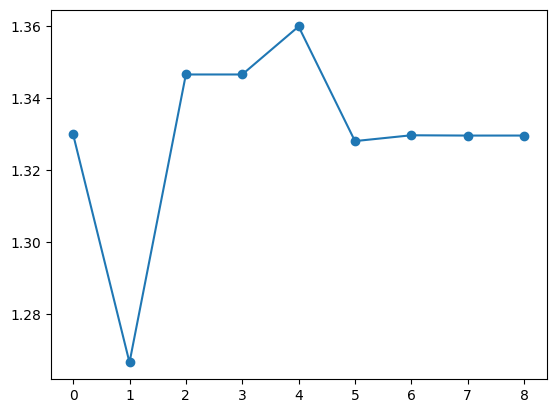

In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

ts = sample['insurance_perc_che']

# Extract observed data (non-missing values)
observed_ts = ts.dropna()

# Fit the ARIMA model
model = ARIMA(observed_ts, order=(1, 0, 0))
model_fit = model.fit()

# Since the index in 'ts' is from 0 to 8, we need to forecast for periods 5 to 8
start = len(observed_ts)
end = len(ts) - 1

# Generate forecast index to match the missing indices
forecast_index = ts.index[ts.isna()]

# Forecast missing values
forecast = model_fit.predict(start=start, end=end)

# Set the index of the forecast to match the missing indices
forecast.index = forecast_index

# Step 5: Impute missing values
ts_imputed = ts.copy()
ts_imputed[ts.isna()] = forecast.values

# Display results
print("\nImputed Time Series:")
print(ts_imputed)

# Plot the observed and imputed time series
plt.plot(ts_imputed, marker='o')

In [42]:
sample['insurance_perc_che'] = ts_imputed

for year in sample['year']:
    countrydf.loc[(countrydf['country'] == 'COUNTRY_B6AE') & (countrydf['year'] == year), 'insurance_perc_che'] = sample.loc[sample['year'] == year, 'insurance_perc_che'].values
print(countrydf.loc[countrydf['country'] == 'COUNTRY_B6AE'])


          country  year  che_pc_usd  che_perc_gdp  insurance_perc_che  \
319  COUNTRY_B6AE  2014    1.245318      1.169626            1.329701   
320  COUNTRY_B6AE  2015    1.253745      1.170452            1.329697   
321  COUNTRY_B6AE  2016    1.219881      1.092798            1.329779   
322  COUNTRY_B6AE  2017    1.210050      1.062021            1.328164   
323  COUNTRY_B6AE  2018    1.264669      1.145262            1.360000   
324  COUNTRY_B6AE  2019    1.294164      1.187723            1.346667   
325  COUNTRY_B6AE  2020    1.299157      1.193787            1.346667   
326  COUNTRY_B6AE  2021    1.326311      1.264991            1.266667   
327  COUNTRY_B6AE  2022    1.336985      1.265876            1.330000   

     population  public_perc_che  
319    1.035608         1.820896  
320    1.036304         1.805970  
321    1.036974         1.805970  
322    1.037615         1.820896  
323    1.038227         1.567164  
324    1.038822         1.522388  
325    1.039414         

In [45]:
for country in ['COUNTRY_06E4', 'COUNTRY_4253', 'COUNTRY_B835']:
    countrydf.loc[countrydf['country'] == country, 'insurance_perc_che'] = countrydf.loc[countrydf['country'] == country, 'insurance_perc_che'].bfill().ffill()
    print(countrydf.loc[countrydf['country'] == country])


         country  year  che_pc_usd  che_perc_gdp  insurance_perc_che  \
9   COUNTRY_06E4  2014    1.826935      1.882272                 1.0   
10  COUNTRY_06E4  2015    1.827091      1.802971                 1.0   
11  COUNTRY_06E4  2016    1.707085      1.486347                 1.0   
12  COUNTRY_06E4  2017    1.730181      1.501710                 1.0   
13  COUNTRY_06E4  2018    1.777154      1.488861                 1.0   
14  COUNTRY_06E4  2019    1.851124      1.503199                 1.0   
15  COUNTRY_06E4  2020    1.842853      1.464473                 1.0   
16  COUNTRY_06E4  2021    1.946005      1.517446                 1.0   
17  COUNTRY_06E4  2022    2.040886      1.499899                 1.0   

    population  public_perc_che  
9     1.001144         1.805970  
10    1.001420         1.805970  
11    1.001781         1.820896  
12    1.002195         1.835821  
13    1.002659         1.835821  
14    1.003178         1.850746  
15    1.003687         1.865672  
16    1

In [48]:
countrydf.to_csv('../data/intermig/countrydf_backwards.csv', index=False)
print(countrydf.info())
countrydf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             426 non-null    object 
 1   year                426 non-null    Int64  
 2   che_pc_usd          417 non-null    float64
 3   che_perc_gdp        408 non-null    float64
 4   insurance_perc_che  355 non-null    float64
 5   population          426 non-null    float64
 6   public_perc_che     417 non-null    float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 23.8+ KB
None


,country,year,che_pc_usd,che_perc_gdp,insurance_perc_che,population,public_perc_che
0,COUNTRY_0309,2014,1.758115,2.068685,2.013333,1.487479,1.791045
1,COUNTRY_0309,2015,1.772316,2.085917,2.013333,1.489576,1.791045
2,COUNTRY_0309,2016,1.650593,1.866491,2.013333,1.491407,1.820896
3,COUNTRY_0309,2017,1.660424,1.875446,2.026667,1.492894,1.865672
4,COUNTRY_0309,2018,1.683833,1.890154,2.026667,1.494175,1.880597


In [66]:
mean_values = countrydf.drop('country', axis=1).groupby('year').mean().reset_index()

mean_imputed = countrydf.copy(deep=True)
for col in countrydf.columns[2:]:
    mean_imputed[col] = mean_imputed.apply(
        lambda row: mean_values.loc[mean_values['year'] == row['year'], col].values[0]
        if pd.isnull(row[col]) else row[col],
        axis=1
    )

mean_imputed.info()

mean_imputed.to_csv('../data/intermig/countrydf_meanimputed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             426 non-null    object 
 1   year                426 non-null    Int64  
 2   che_pc_usd          426 non-null    float64
 3   che_perc_gdp        426 non-null    float64
 4   insurance_perc_che  426 non-null    float64
 5   population          426 non-null    float64
 6   public_perc_che     426 non-null    float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 23.8+ KB


In [64]:
median_values = countrydf.drop('country', axis=1).groupby('year').median().reset_index()

median_imputed = countrydf.copy(deep=True)
for col in countrydf.columns[2:]:
    median_imputed[col] = median_imputed.apply(
        lambda row: mean_values.loc[mean_values['year'] == row['year'], col].values[0]
        if pd.isnull(row[col]) else row[col],
        axis=1
    )

median_imputed.info()

median_imputed.to_csv('../data/intermig/countrydf_medianimputed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             426 non-null    object 
 1   year                426 non-null    Int64  
 2   che_pc_usd          426 non-null    float64
 3   che_perc_gdp        426 non-null    float64
 4   insurance_perc_che  426 non-null    float64
 5   population          426 non-null    float64
 6   public_perc_che     426 non-null    float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 23.8+ KB
